In [13]:
#lets make some fake time series data
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#we want this to be across 10 days, but we want a lot of data because the actual analysis will involve a lot of data as multiple runs took place
date_rng=pd.date_range(start='1/1/2019', end='1/10/2019', freq='5H')

In [14]:
#okay we have our 10 days now we need to make some datasets with each condition
#df_ss_st==dataframe same subject same task;
#we predict this to have the highest accuracy >90% so lets generate data around that range
df_ss_st=pd.DataFrame(date_rng, columns=['date'])
df_ss_st['Accuracy']=np.random.randint(90,100, size=(len(date_rng)))
df_ss_st['Day']=df_ss_st['date'].dt.day
df_ss_st['Test Set']='SS ST'

#df_ss_dt==dataframe same subject different task;
#we predict this to have the second highest accuracy >70%
df_ss_dt=pd.DataFrame(date_rng, columns=['date'])
df_ss_dt['Accuracy']=np.random.randint(70,100, size=(len(date_rng)))
df_ss_dt['Day']=df_ss_dt['date'].dt.day
df_ss_dt['Test Set']='SS DT'

#df_ds_st==dataframe different subject same task;
#we predict the classifier will have greater variability and lower in accuracy <70
df_ds_st=pd.DataFrame(date_rng, columns=['date'])
df_ds_st['Accuracy']=np.random.randint(40,70, size=(len(date_rng)))
df_ds_st['Day']=df_ds_st['date'].dt.day
df_ds_st['Test Set']='DS ST'

#df_ds_dt==dataframe different subject different task;
#we predict the classifier will have the greatest variability and lowest accuracy <60
df_ds_dt=pd.DataFrame(date_rng, columns=['date'])
df_ds_dt['Accuracy']=np.random.randint(20,70, size=(len(date_rng)))
df_ds_dt['Day']=df_ds_dt['date'].dt.day
df_ds_dt['Test Set']='DS DT'

In [15]:
df_ss_st.head(15)

,date,Accuracy,Day,Test Set
0,2019-01-01 00:00:00,99,1,SS ST
1,2019-01-01 05:00:00,90,1,SS ST
2,2019-01-01 10:00:00,98,1,SS ST
3,2019-01-01 15:00:00,94,1,SS ST
4,2019-01-01 20:00:00,99,1,SS ST
5,2019-01-02 01:00:00,93,2,SS ST
6,2019-01-02 06:00:00,97,2,SS ST
7,2019-01-02 11:00:00,98,2,SS ST
8,2019-01-02 16:00:00,97,2,SS ST
9,2019-01-02 21:00:00,98,2,SS ST


In [16]:
#now were going to append them altogether
#appending ss_dt to ss_st
master_df=df_ss_st.append([df_ss_dt,df_ds_st,df_ds_dt])

#make a palette to guide readers
#assign an array with colors wanted
#same subject variations of blue, different subjects variation of green
colors=["#00410e", "#7fb68b", "#335a87", "#98bcc9"]
#set color palette
palette=sns.set_palette(sns.color_palette(colors))

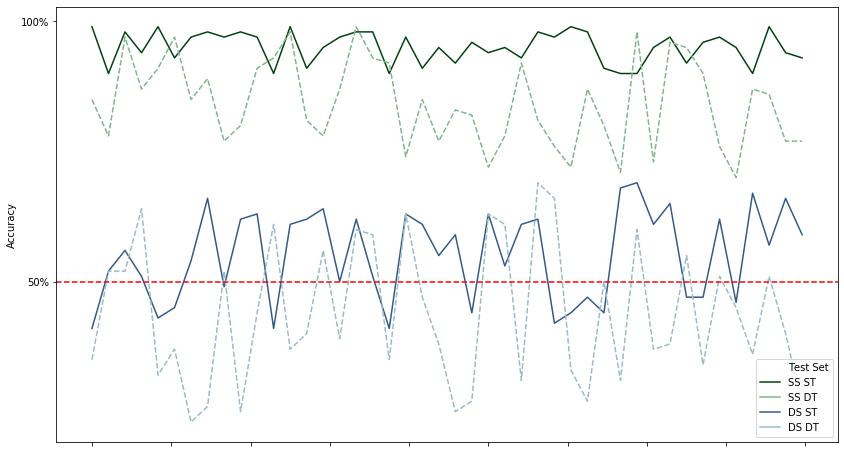

In [23]:
plt.figure(figsize=(14, 8))
g=sns.lineplot(x='date', y='Accuracy', hue='Test Set', data=master_df, palette=palette)
#make things look pretty
g.set(xticklabels=[])
g.set(xlabel=' ')
g.set_yticks([50, 100])
g.set_yticklabels(["50%", "100%"])
g.lines[1].set_linestyle("--")
g.lines[3].set_linestyle("--")
g.legend(loc='lower right')
#draw a line around the 50% area
g.axhline(50, ls='--', c='red')
plt.show()
g.figure.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/fig2.png')